In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from tensorflow.keras.models import Sequential, load_model
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
# from keras.utils import to_categorical
from sklearn import metrics
import h5py
from sklearn import utils
from tensorflow.keras.backend import clear_session

Using TensorFlow backend.


In [2]:
right_images = np.load('20200514_right__Chiral_D_Large_TIFF_Cropped_four_rows_sel_NPs_rotated.npy')
right_labels = [[1,0] for i in np.arange(0,len(right_images))]
left_images = np.load('20200514_left__Chiral_D_Large_TIFF_Cropped_four_rows_sel_NPs_rotated.npy')
left_labels = [[0,1] for i in np.arange(0,len(left_images))]

In [3]:
left_images.shape

(6, 128, 128)

In [4]:
for img in left_images:
    np.append(right_images,np.fliplr(img))
    np.append(right_labels,[1,0])

In [5]:
left_images.shape

(6, 128, 128)

In [6]:
split = int(len(right_labels)*0.2)

In [7]:
split

76

In [8]:
split = int(len(right_labels)*0.2)
new_left_images = []
new_left_labels = []
new_right_images = []
new_right_labels = []
for img in right_images[:split]:
    new_left_images.append(img)
    new_left_labels.append([0,1])
    new_right_images.append(np.fliplr(img))
    new_right_labels.append([1,0])
for img in right_images[split:]:
    new_left_images.append(np.fliplr(img))
    new_left_labels.append([0,1])
    new_right_images.append(img)
    new_right_labels.append([1,0])
new_left_images = np.array(new_left_images)
new_right_images = np.array(new_right_images)

In [9]:
right_img_shuff, right_label_shuff = utils.shuffle(new_right_images, new_right_labels,random_state=0)
left_img_shuff, left_label_shuff = utils.shuffle(new_left_images, new_left_labels,random_state=0)

In [10]:
X_train = np.concatenate((right_img_shuff[:191],left_img_shuff[:191]),axis =0)
Y_train = np.concatenate((right_label_shuff[:191],left_label_shuff[:191]),axis = 0)
X_test = np.concatenate((right_img_shuff[191:286],left_img_shuff[191:286]),axis = 0)
Y_test = np.concatenate((right_label_shuff[191:286],left_label_shuff[191:286]),axis = 0)

In [11]:
X_train_norm = X_train/X_train.max()
X_test_norm = X_test/X_test.max()
X_train_norm = np.expand_dims(X_train_norm,axis=3)
X_test_norm = np.expand_dims(X_test_norm,axis=3)

In [12]:
X_train_shuff, Y_train_shuff = utils.shuffle(X_train_norm, Y_train,random_state=0)
X_test_shuff, Y_test_shuff = utils.shuffle(X_test_norm, Y_test,random_state=0)

In [14]:
batch_size = 20
seed = 42
train_datagen = ImageDataGenerator(
        rotation_range = 10,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=False,
        vertical_flip = False)

test_datagen = ImageDataGenerator(rescale=1.)

train_generator = train_datagen.flow(X_train_shuff, y=Y_train_shuff, batch_size=batch_size,seed=seed)
val_generator = test_datagen.flow(X_test_shuff,y=Y_test_shuff,batch_size=batch_size,seed=seed)

In [15]:
modelE = keras.models.Sequential()
modelE.add(Conv2D(32, (3, 3), input_shape=(128, 128,1)))
modelE.add(Activation('relu'))
modelE.add(MaxPooling2D(pool_size=(2, 2)))

modelE.add(Conv2D(32, (3, 3)))
modelE.add(Activation('relu'))
modelE.add(MaxPooling2D(pool_size=(2, 2)))

modelE.add(Conv2D(64, (3, 3)))
modelE.add(Activation('relu'))
modelE.add(MaxPooling2D(pool_size=(2, 2)))

modelE.add(Conv2D(64, (3, 3)))
modelE.add(Activation('relu'))
modelE.add(MaxPooling2D(pool_size=(2, 2)))

modelE.add(Conv2D(64, (3, 3)))
modelE.add(Activation('relu'))
modelE.add(MaxPooling2D(pool_size=(2, 2)))

modelE.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
modelE.add(Dense(64))
modelE.add(Activation('relu'))
modelE.add(Dropout(0.5))
modelE.add(Dense(2))
modelE.add(Activation('softmax'))

modelE.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [16]:
historyE = modelE.fit_generator(
        train_generator,
        steps_per_epoch=10000 // batch_size,
        epochs=60,
        validation_data=val_generator,
        validation_steps=200 // batch_size)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/60
500/500 [==============================] - 64s 127ms/step - loss: 0.6944 - accuracy: 0.4945 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/60
500/500 [==============================] - 64s 128ms/step - loss: 0.6940 - accuracy: 0.4980 - val_loss: 0.6920 - val_accuracy: 0.5316
Epoch 3/60
500/500 [==============================] - 64s 129ms/step - loss: 0.6826 - accuracy: 0.5597 - val_loss: 0.6824 - val_accuracy: 0.5421
Epoch 4/60
500/500 [==============================] - 64s 128ms/step - loss: 0.6089 - accuracy: 0.6582 - val_loss: 0.9058 - val_accuracy: 0.5789
Epoch 5/60
500/500 [==============================] - 64s 128ms/step - loss: 0.5197 - accuracy: 0.7435 - val_loss: 0.7182 - val_accuracy: 0.6579
Epoch 6/60
500/500 [==============================] - 65s 130ms/step - loss: 0.4026 - accuracy: 0.8151 - val_loss: 0.8736 - val_accuracy: 0.6684
Epoch 7/60
500/500 [==============================] - 

500/500 [==============================] - 63s 125ms/step - loss: 0.1536 - accuracy: 0.9708 - val_loss: 6.8841 - val_accuracy: 0.7053
Epoch 56/60
500/500 [==============================] - 63s 125ms/step - loss: 0.1780 - accuracy: 0.9710 - val_loss: 4.6555 - val_accuracy: 0.6947
Epoch 57/60
500/500 [==============================] - 62s 125ms/step - loss: 0.1900 - accuracy: 0.9726 - val_loss: 8.2148 - val_accuracy: 0.6737
Epoch 58/60
500/500 [==============================] - 63s 125ms/step - loss: 0.1490 - accuracy: 0.9659 - val_loss: 5.0749 - val_accuracy: 0.6895
Epoch 59/60
500/500 [==============================] - 62s 123ms/step - loss: 0.1859 - accuracy: 0.9670 - val_loss: 4.2505 - val_accuracy: 0.7000
Epoch 60/60
500/500 [==============================] - 61s 122ms/step - loss: 0.1646 - accuracy: 0.9725 - val_loss: 4.7482 - val_accuracy: 0.6579


In [17]:
modelE.save_weights('chirality_classification_20pwrongleftrightlabels_weights_20200717.h5')

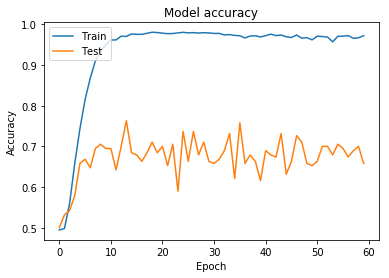

In [18]:
plt.plot(historyE.history['accuracy'])
plt.plot(historyE.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

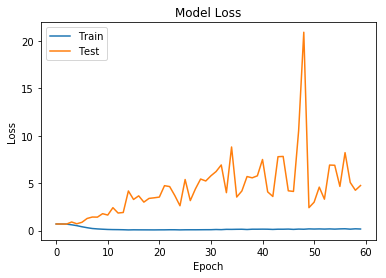

In [19]:
plt.plot(historyE.history['loss'])
plt.plot(historyE.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [20]:
X_val = np.concatenate((right_img_shuff[286:],left_img_shuff[286:]),axis = 0)
Y_val = np.concatenate((right_label_shuff[286:],left_label_shuff[286:]),axis = 0)

In [21]:
X_val = X_val/X_val.max()
X_val = np.expand_dims(X_val,axis=3)

In [22]:
X_val, Y_val = utils.shuffle(X_val, Y_val,random_state=0)

In [23]:
pred = modelE.predict(X_val)

In [24]:
modelE.evaluate(X_val,Y_val)

7/7 [==============================] - 0s 32ms/step - loss: 4.0941 - accuracy: 0.6392


[4.094064235687256, 0.6391752362251282]

In [48]:
print(metrics.accuracy_score(Y_val,pred))

ValueError: Classification metrics can't handle a mix of multilabel-indicator and continuous-multioutput targets

In [50]:
modelE.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 126, 126, 32)      320       
_________________________________________________________________
activation_7 (Activation)    (None, 126, 126, 32)      0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 61, 61, 32)        9248      
_________________________________________________________________
activation_8 (Activation)    (None, 61, 61, 32)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 64)       

# 10% wrong

In [25]:
clear_session()

In [26]:
del modelE

In [27]:
split = int(len(right_labels)*0.1)
new_left_images = []
new_left_labels = []
new_right_images = []
new_right_labels = []
for img in right_images[:split]:
    new_left_images.append(img)
    new_left_labels.append([0,1])
    new_right_images.append(np.fliplr(img))
    new_right_labels.append([1,0])
for img in right_images[split:]:
    new_left_images.append(np.fliplr(img))
    new_left_labels.append([0,1])
    new_right_images.append(img)
    new_right_labels.append([1,0])
new_left_images = np.array(new_left_images)
new_right_images = np.array(new_right_images)

In [28]:
right_img_shuff, right_label_shuff = utils.shuffle(new_right_images, new_right_labels,random_state=0)
left_img_shuff, left_label_shuff = utils.shuffle(new_left_images, new_left_labels,random_state=0)

In [29]:
X_train = np.concatenate((right_img_shuff[:191],left_img_shuff[:191]),axis =0)
Y_train = np.concatenate((right_label_shuff[:191],left_label_shuff[:191]),axis = 0)
X_test = np.concatenate((right_img_shuff[191:286],left_img_shuff[191:286]),axis = 0)
Y_test = np.concatenate((right_label_shuff[191:286],left_label_shuff[191:286]),axis = 0)

In [30]:
X_train_norm = X_train/X_train.max()
X_test_norm = X_test/X_test.max()
X_train_norm = np.expand_dims(X_train_norm,axis=3)
X_test_norm = np.expand_dims(X_test_norm,axis=3)

In [31]:
X_train_shuff, Y_train_shuff = utils.shuffle(X_train_norm, Y_train,random_state=0)
X_test_shuff, Y_test_shuff = utils.shuffle(X_test_norm, Y_test,random_state=0)

In [32]:
batch_size = 20
seed = 42
train_datagen = ImageDataGenerator(
        rotation_range = 10,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=False,
        vertical_flip = False)

test_datagen = ImageDataGenerator(rescale=1.)

train_generator = train_datagen.flow(X_train_shuff, y=Y_train_shuff, batch_size=batch_size,seed=seed)
val_generator = test_datagen.flow(X_test_shuff,y=Y_test_shuff,batch_size=batch_size,seed=seed)

In [33]:
modelE = keras.models.Sequential()
modelE.add(Conv2D(32, (3, 3), input_shape=(128, 128,1)))
modelE.add(Activation('relu'))
modelE.add(MaxPooling2D(pool_size=(2, 2)))

modelE.add(Conv2D(32, (3, 3)))
modelE.add(Activation('relu'))
modelE.add(MaxPooling2D(pool_size=(2, 2)))

modelE.add(Conv2D(64, (3, 3)))
modelE.add(Activation('relu'))
modelE.add(MaxPooling2D(pool_size=(2, 2)))

modelE.add(Conv2D(64, (3, 3)))
modelE.add(Activation('relu'))
modelE.add(MaxPooling2D(pool_size=(2, 2)))

modelE.add(Conv2D(64, (3, 3)))
modelE.add(Activation('relu'))
modelE.add(MaxPooling2D(pool_size=(2, 2)))

modelE.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
modelE.add(Dense(64))
modelE.add(Activation('relu'))
modelE.add(Dropout(0.5))
modelE.add(Dense(2))
modelE.add(Activation('softmax'))

modelE.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [34]:
historyE = modelE.fit_generator(
        train_generator,
        steps_per_epoch=10000 // batch_size,
        epochs=60,
        validation_data=val_generator,
        validation_steps=200 // batch_size)

Epoch 1/60
500/500 [==============================] - 62s 124ms/step - loss: 0.6944 - accuracy: 0.4963 - val_loss: 0.6931 - val_accuracy: 0.5421
Epoch 2/60
500/500 [==============================] - 62s 124ms/step - loss: 0.6937 - accuracy: 0.4882 - val_loss: 0.6929 - val_accuracy: 0.5158
Epoch 3/60
500/500 [==============================] - 62s 125ms/step - loss: 0.6937 - accuracy: 0.5016 - val_loss: 0.6901 - val_accuracy: 0.5368
Epoch 4/60
500/500 [==============================] - 62s 125ms/step - loss: 0.6277 - accuracy: 0.6371 - val_loss: 0.7152 - val_accuracy: 0.6158
Epoch 5/60
500/500 [==============================] - 62s 125ms/step - loss: 0.4178 - accuracy: 0.8108 - val_loss: 0.9564 - val_accuracy: 0.6263
Epoch 6/60
500/500 [==============================] - 62s 124ms/step - loss: 0.2660 - accuracy: 0.8951 - val_loss: 0.6455 - val_accuracy: 0.8211
Epoch 7/60
500/500 [==============================] - 62s 124ms/step - loss: 0.1579 - accuracy: 0.9419 - val_loss: 1.4242 - val_ac

500/500 [==============================] - 62s 124ms/step - loss: 0.0597 - accuracy: 0.9903 - val_loss: 3.6666 - val_accuracy: 0.7526
Epoch 58/60
500/500 [==============================] - 61s 123ms/step - loss: 0.0524 - accuracy: 0.9884 - val_loss: 6.5282 - val_accuracy: 0.7526
Epoch 59/60
500/500 [==============================] - 62s 123ms/step - loss: 0.0570 - accuracy: 0.9910 - val_loss: 4.0245 - val_accuracy: 0.7895
Epoch 60/60
500/500 [==============================] - 62s 123ms/step - loss: 0.0932 - accuracy: 0.9895 - val_loss: 4.6402 - val_accuracy: 0.7842


In [35]:
modelE.save_weights('chirality_classification_10pwrongleftrightlabels_weights_20200720.h5')

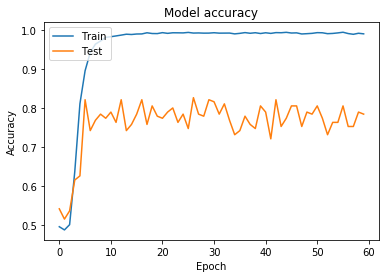

In [36]:
plt.plot(historyE.history['accuracy'])
plt.plot(historyE.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

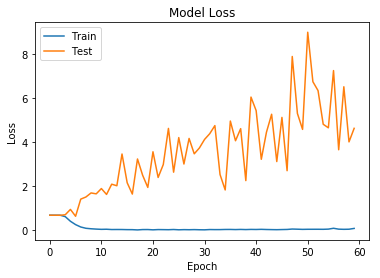

In [37]:
plt.plot(historyE.history['loss'])
plt.plot(historyE.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [38]:
X_val = np.concatenate((right_img_shuff[286:],left_img_shuff[286:]),axis = 0)
Y_val = np.concatenate((right_label_shuff[286:],left_label_shuff[286:]),axis = 0)
X_val = X_val/X_val.max()
X_val = np.expand_dims(X_val,axis=3)
X_val, Y_val = utils.shuffle(X_val, Y_val,random_state=0)
modelE.evaluate(X_val,Y_val)

7/7 [==============================] - 0s 31ms/step - loss: 3.5386 - accuracy: 0.8247


[3.538569450378418, 0.8247422575950623]

# 5% Wrong

Epoch 1/60
25/25 [==============================] - 4s 146ms/step - loss: 0.6974 - accuracy: 0.5000 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 2/60
25/25 [==============================] - 4s 141ms/step - loss: 0.6915 - accuracy: 0.5145 - val_loss: 0.6925 - val_accuracy: 0.5158
Epoch 3/60
25/25 [==============================] - 3s 140ms/step - loss: 0.6979 - accuracy: 0.5062 - val_loss: 0.6938 - val_accuracy: 0.4737
Epoch 4/60
25/25 [==============================] - 3s 136ms/step - loss: 0.6945 - accuracy: 0.5000 - val_loss: 0.6928 - val_accuracy: 0.5211
Epoch 5/60
25/25 [==============================] - 3s 137ms/step - loss: 0.6939 - accuracy: 0.5041 - val_loss: 0.6926 - val_accuracy: 0.5368
Epoch 6/60
25/25 [==============================] - 4s 141ms/step - loss: 0.6943 - accuracy: 0.4876 - val_loss: 0.6927 - val_accuracy: 0.5211
Epoch 7/60
25/25 [==============================] - 4s 140ms/step - loss: 0.6957 - accuracy: 0.5000 - val_loss: 0.6939 - val_accuracy: 0.4842
Epoch 

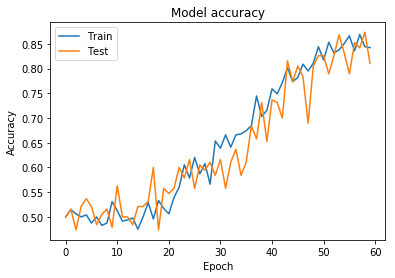

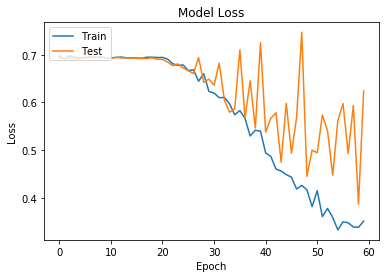

7/7 [==============================] - 0s 38ms/step - loss: 0.3087 - accuracy: 0.8763


[0.30873987078666687, 0.876288652420044]

In [74]:
clear_session()

del modelE

split = int(len(right_labels)*0.05)
new_left_images = []
new_left_labels = []
new_right_images = []
new_right_labels = []
for img in right_images[:split]:
    new_left_images.append(img)
    new_left_labels.append([0,1])
    new_right_images.append(np.fliplr(img))
    new_right_labels.append([1,0])
for img in right_images[split:]:
    new_left_images.append(np.fliplr(img))
    new_left_labels.append([0,1])
    new_right_images.append(img)
    new_right_labels.append([1,0])
new_left_images = np.array(new_left_images)
new_right_images = np.array(new_right_images)

right_img_shuff, right_label_shuff = utils.shuffle(new_right_images, new_right_labels,random_state=0)
left_img_shuff, left_label_shuff = utils.shuffle(new_left_images, new_left_labels,random_state=0)

X_train = np.concatenate((right_img_shuff[:191],left_img_shuff[:191]),axis =0)
Y_train = np.concatenate((right_label_shuff[:191],left_label_shuff[:191]),axis = 0)
X_test = np.concatenate((right_img_shuff[191:286],left_img_shuff[191:286]),axis = 0)
Y_test = np.concatenate((right_label_shuff[191:286],left_label_shuff[191:286]),axis = 0)

X_train_norm = X_train/X_train.max()
X_test_norm = X_test/X_test.max()
X_train_norm = np.expand_dims(X_train_norm,axis=3)
X_test_norm = np.expand_dims(X_test_norm,axis=3)

X_train_shuff, Y_train_shuff = utils.shuffle(X_train_norm, Y_train,random_state=0)
X_test_shuff, Y_test_shuff = utils.shuffle(X_test_norm, Y_test,random_state=0)

batch_size = 20
seed = 42
train_datagen = ImageDataGenerator(
        rotation_range = 10,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=False,
        vertical_flip = False)

test_datagen = ImageDataGenerator(rescale=1.)

train_generator = train_datagen.flow(X_train_shuff, y=Y_train_shuff, batch_size=batch_size,seed=seed)
val_generator = test_datagen.flow(X_test_shuff,y=Y_test_shuff,batch_size=batch_size,seed=seed)

modelE = keras.models.Sequential()
modelE.add(Conv2D(32, (3, 3), input_shape=(128, 128,1)))
modelE.add(Activation('relu'))
modelE.add(MaxPooling2D(pool_size=(2, 2)))

modelE.add(Conv2D(32, (3, 3)))
modelE.add(Activation('relu'))
modelE.add(MaxPooling2D(pool_size=(2, 2)))

modelE.add(Conv2D(64, (3, 3)))
modelE.add(Activation('relu'))
modelE.add(MaxPooling2D(pool_size=(2, 2)))

modelE.add(Conv2D(64, (3, 3)))
modelE.add(Activation('relu'))
modelE.add(MaxPooling2D(pool_size=(2, 2)))

modelE.add(Conv2D(64, (3, 3)))
modelE.add(Activation('relu'))
modelE.add(MaxPooling2D(pool_size=(2, 2)))

modelE.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
modelE.add(Dense(64))
modelE.add(Activation('relu'))
modelE.add(Dropout(0.5))
modelE.add(Dense(2))
modelE.add(Activation('softmax'))

modelE.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

historyE = modelE.fit_generator(
        train_generator,
        steps_per_epoch=500 // batch_size,
        epochs=60,
        validation_data=val_generator,
        validation_steps=200 // batch_size)

modelE.save_weights('chirality_classification_5pwrongleftrightlabels_weights_20200720.h5')

plt.figure()
plt.plot(historyE.history['accuracy'])
plt.plot(historyE.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.figure()
plt.plot(historyE.history['loss'])
plt.plot(historyE.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

X_val = np.concatenate((right_img_shuff[286:],left_img_shuff[286:]),axis = 0)
Y_val = np.concatenate((right_label_shuff[286:],left_label_shuff[286:]),axis = 0)
X_val = X_val/X_val.max()
X_val = np.expand_dims(X_val,axis=3)
X_val, Y_val = utils.shuffle(X_val, Y_val,random_state=0)
modelE.evaluate(X_val,Y_val)

## Testing 5% model with clean labels

In [77]:
clean_right_images = right_images.copy()

In [78]:
clean_right_images.shape

(383, 128, 128)

In [79]:
clean_left_images = np.array([np.fliplr(r) for r in clean_right_images])

In [80]:
clean_left_images.shape

(383, 128, 128)

In [81]:
right_labels = np.array([[1,0] for i in clean_right_images])
left_labels = np.array([[0,1] for i in clean_left_images])

In [82]:
clean_right_img_shuff, clean_right_label_shuff = utils.shuffle(clean_right_images, right_labels,random_state=0)
clean_left_img_shuff, clean_left_label_shuff = utils.shuffle(clean_left_images, left_labels,random_state=0)

In [84]:
X_train_clean = np.concatenate((clean_right_img_shuff[:191],clean_left_img_shuff[:191]),axis =0)
Y_train_clean = np.concatenate((clean_right_label_shuff[:191],clean_left_label_shuff[:191]),axis = 0)
X_test_clean = np.concatenate((clean_right_img_shuff[191:286],clean_left_img_shuff[191:286]),axis = 0)
Y_test_clean = np.concatenate((clean_right_label_shuff[191:286],clean_left_label_shuff[191:286]),axis = 0)

In [85]:
X_train_clean = X_train_clean/X_train_clean.max()
X_test_clean = X_test_clean/X_test_clean.max()


In [86]:
X_train_clean, Y_train_clean = utils.shuffle(X_train_clean, Y_train_clean,random_state=0)
X_test_clean, Y_test_clean = utils.shuffle(X_test_clean, Y_test_clean,random_state=0)

In [90]:
X_test_clean = np.expand_dims(X_test_clean,axis=3)
X_train_clean = np.expand_dims(X_train_clean,axis=3)

In [92]:
X_val_clean = np.concatenate((clean_right_img_shuff[286:],clean_left_img_shuff[286:]),axis = 0)
Y_val_clean = np.concatenate((clean_right_label_shuff[286:],clean_left_label_shuff[286:]),axis = 0)

In [96]:
X_val_clean = np.expand_dims(X_val_clean,axis=3)
X_val_clean = X_val_clean/X_val_clean.max()

In [100]:
modelE.evaluate(X_val_clean,Y_val_clean)

7/7 [==============================] - 0s 33ms/step - loss: 0.2789 - accuracy: 0.8969


[0.2788918912410736, 0.8969072103500366]

## Testing 20% model with clean labels

In [101]:
model20 = keras.models.Sequential()
model20.add(Conv2D(32, (3, 3), input_shape=(128, 128,1)))
model20.add(Activation('relu'))
model20.add(MaxPooling2D(pool_size=(2, 2)))

model20.add(Conv2D(32, (3, 3)))
model20.add(Activation('relu'))
model20.add(MaxPooling2D(pool_size=(2, 2)))

model20.add(Conv2D(64, (3, 3)))
model20.add(Activation('relu'))
model20.add(MaxPooling2D(pool_size=(2, 2)))

model20.add(Conv2D(64, (3, 3)))
model20.add(Activation('relu'))
model20.add(MaxPooling2D(pool_size=(2, 2)))

model20.add(Conv2D(64, (3, 3)))
model20.add(Activation('relu'))
model20.add(MaxPooling2D(pool_size=(2, 2)))

model20.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model20.add(Dense(64))
model20.add(Activation('relu'))
model20.add(Dropout(0.5))
model20.add(Dense(2))
model20.add(Activation('softmax'))

model20.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
model20.load_weights('chirality_classification_20pwrongleftrightlabels_weights_20200717.h5')

In [102]:
model20.evaluate(X_val_clean,Y_val_clean)

7/7 [==============================] - 0s 38ms/step - loss: 0.6932 - accuracy: 0.5000


[0.6931666731834412, 0.5]

In [103]:
model20.predict(X_val)

array([[0.49687868, 0.5031213 ],
       [0.49687868, 0.5031213 ],
       [0.49687868, 0.5031213 ],
       [0.49687868, 0.5031213 ],
       [0.49687868, 0.5031213 ],
       [0.49687868, 0.5031213 ],
       [0.49687868, 0.5031213 ],
       [0.49687868, 0.5031213 ],
       [0.49687868, 0.5031213 ],
       [0.49687868, 0.5031213 ],
       [0.49687868, 0.5031213 ],
       [0.49687868, 0.5031213 ],
       [0.49687868, 0.5031213 ],
       [0.49687868, 0.5031213 ],
       [0.49687868, 0.5031213 ],
       [0.49687868, 0.5031213 ],
       [0.49687868, 0.5031213 ],
       [0.49687868, 0.5031213 ],
       [0.49687868, 0.5031213 ],
       [0.49687868, 0.5031213 ],
       [0.49687868, 0.5031213 ],
       [0.49687868, 0.5031213 ],
       [0.49687868, 0.5031213 ],
       [0.49687868, 0.5031213 ],
       [0.49687868, 0.5031213 ],
       [0.49687868, 0.5031213 ],
       [0.49687868, 0.5031213 ],
       [0.49687868, 0.5031213 ],
       [0.49687868, 0.5031213 ],
       [0.49687868, 0.5031213 ],
       [0.

## Testing 10% model with clean labels

In [104]:
def get_conv_net(input_shape = (128,128,1),classes = 2):
    model = keras.models.Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=input_shape))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
    model.add(Dense(64))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(classes))
    model.add(Activation('softmax'))
    return model

In [106]:
model10 = get_conv_net()

model10.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
model10.load_weights('chirality_classification_10pwrongleftrightlabels_weights_20200720.h5')

In [107]:
model10.evaluate(X_val_clean,Y_val_clean)

7/7 [==============================] - 0s 37ms/step - loss: 0.6932 - accuracy: 0.5000


[0.6931610703468323, 0.5]

## Trying partial training with 5% and 20% false labels

In [110]:
# make 20% dataset again
split = int(len(right_labels)*0.2)
new_left_images = []
new_left_labels = []
new_right_images = []
new_right_labels = []
for img in right_images[:split]:
    new_left_images.append(img)
    new_left_labels.append([0,1])
    new_right_images.append(np.fliplr(img))
    new_right_labels.append([1,0])
for img in right_images[split:]:
    new_left_images.append(np.fliplr(img))
    new_left_labels.append([0,1])
    new_right_images.append(img)
    new_right_labels.append([1,0])
new_left_images = np.array(new_left_images)
new_right_images = np.array(new_right_images)

right_img_shuff, right_label_shuff = utils.shuffle(new_right_images, new_right_labels,random_state=0)
left_img_shuff, left_label_shuff = utils.shuffle(new_left_images, new_left_labels,random_state=0)

X_train = np.concatenate((right_img_shuff[:191],left_img_shuff[:191]),axis =0)
Y_train = np.concatenate((right_label_shuff[:191],left_label_shuff[:191]),axis = 0)
X_test = np.concatenate((right_img_shuff[191:286],left_img_shuff[191:286]),axis = 0)
Y_test = np.concatenate((right_label_shuff[191:286],left_label_shuff[191:286]),axis = 0)

X_train_norm = X_train/X_train.max()
X_test_norm = X_test/X_test.max()
X_train_norm = np.expand_dims(X_train_norm,axis=3)
X_test_norm = np.expand_dims(X_test_norm,axis=3)

X_train_shuff20, Y_train_shuff20 = utils.shuffle(X_train_norm, Y_train,random_state=42)
X_test_shuff20, Y_test_shuff20 = utils.shuffle(X_test_norm, Y_test,random_state=42)

X_val20 = np.concatenate((right_img_shuff[286:],left_img_shuff[286:]),axis = 0)
Y_val20 = np.concatenate((right_label_shuff[286:],left_label_shuff[286:]),axis = 0)
X_val20 = X_val20/X_val20.max()
X_val20 = np.expand_dims(X_val20,axis=3)

Epoch 1/35
25/25 [==============================] - 4s 148ms/step - loss: 0.6973 - accuracy: 0.4959 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/35
25/25 [==============================] - 4s 144ms/step - loss: 0.6942 - accuracy: 0.4813 - val_loss: 0.6925 - val_accuracy: 0.5263
Epoch 3/35
25/25 [==============================] - 4s 146ms/step - loss: 0.6947 - accuracy: 0.4627 - val_loss: 0.6933 - val_accuracy: 0.4895
Epoch 4/35
25/25 [==============================] - 3s 138ms/step - loss: 0.6940 - accuracy: 0.4612 - val_loss: 0.6926 - val_accuracy: 0.5579
Epoch 5/35
25/25 [==============================] - 4s 143ms/step - loss: 0.6934 - accuracy: 0.4730 - val_loss: 0.6932 - val_accuracy: 0.4947
Epoch 6/35
25/25 [==============================] - 4s 152ms/step - loss: 0.6928 - accuracy: 0.5145 - val_loss: 0.6921 - val_accuracy: 0.5368
Epoch 7/35
25/25 [==============================] - 4s 155ms/step - loss: 0.6941 - accuracy: 0.4440 - val_loss: 0.6932 - val_accuracy: 0.4947
Epoch 

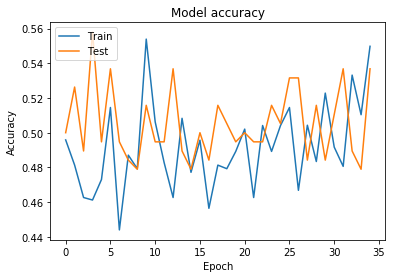

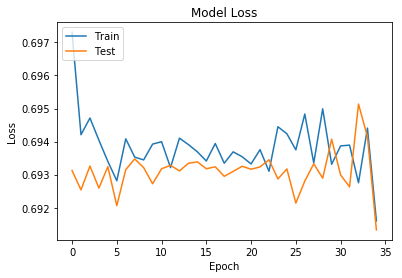

Epoch 1/25
25/25 [==============================] - 4s 153ms/step - loss: 0.6945 - accuracy: 0.5332 - val_loss: 0.6929 - val_accuracy: 0.5053
Epoch 2/25
25/25 [==============================] - 4s 148ms/step - loss: 0.6941 - accuracy: 0.5021 - val_loss: 0.6913 - val_accuracy: 0.5526
Epoch 3/25
25/25 [==============================] - 4s 148ms/step - loss: 0.6926 - accuracy: 0.5228 - val_loss: 0.6919 - val_accuracy: 0.5474
Epoch 4/25
25/25 [==============================] - 4s 150ms/step - loss: 0.6899 - accuracy: 0.5366 - val_loss: 0.6921 - val_accuracy: 0.5368
Epoch 5/25
25/25 [==============================] - 4s 149ms/step - loss: 0.6884 - accuracy: 0.5373 - val_loss: 0.6866 - val_accuracy: 0.5474
Epoch 6/25
25/25 [==============================] - 4s 151ms/step - loss: 0.6886 - accuracy: 0.5539 - val_loss: 0.6892 - val_accuracy: 0.5632
Epoch 7/25
25/25 [==============================] - 4s 156ms/step - loss: 0.6848 - accuracy: 0.5602 - val_loss: 0.6840 - val_accuracy: 0.6053
Epoch 

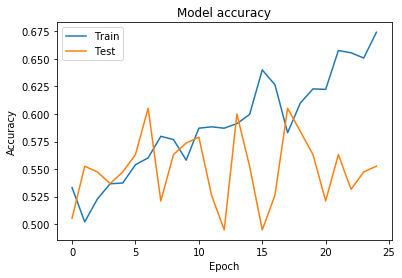

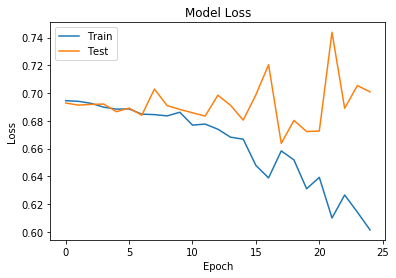

7/7 [==============================] - 0s 34ms/step - loss: 0.5994 - accuracy: 0.6546


[0.5994003415107727, 0.6546391844749451]

In [109]:
model_retrain = get_conv_net()

model_retrain.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

history_retrain = model_retrain.fit_generator(
        train_generator,
        steps_per_epoch=500 // batch_size,
        epochs=35,
        validation_data=val_generator,
        validation_steps=200 // batch_size)

model_retrain.save_weights('chirality_classification_retraining5pthen20p_weights_20200727.h5')

plt.figure()
plt.plot(history_retrain.history['accuracy'])
plt.plot(history_retrain.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.figure()
plt.plot(history_retrain.history['loss'])
plt.plot(history_retrain.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

train_generator20 = train_datagen.flow(X_train_shuff20, y=Y_train_shuff20, batch_size=batch_size,seed=seed)
val_generator20 = test_datagen.flow(X_test_shuff20,y=Y_test_shuff20,batch_size=batch_size,seed=seed)

history_retrain = model_retrain.fit_generator(
        train_generator20,
        steps_per_epoch=500 // batch_size,
        epochs=25,
        validation_data=val_generator20,
        validation_steps=200 // batch_size)

model_retrain.save_weights('chirality_classification_retraining5pthen20p_weights_20200727.h5')

plt.figure()
plt.plot(history_retrain.history['accuracy'])
plt.plot(history_retrain.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.figure()
plt.plot(history_retrain.history['loss'])
plt.plot(history_retrain.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


model_retrain.evaluate(X_val_clean,Y_val_clean)

Epoch 1/50
25/25 [==============================] - 4s 142ms/step - loss: 0.6004 - accuracy: 0.6659 - val_loss: 0.6519 - val_accuracy: 0.6158
Epoch 2/50
25/25 [==============================] - 4s 143ms/step - loss: 0.5540 - accuracy: 0.7303 - val_loss: 0.6401 - val_accuracy: 0.6474
Epoch 3/50
25/25 [==============================] - 4s 142ms/step - loss: 0.5322 - accuracy: 0.7282 - val_loss: 0.5820 - val_accuracy: 0.7158
Epoch 4/50
25/25 [==============================] - 4s 151ms/step - loss: 0.5197 - accuracy: 0.7220 - val_loss: 0.6037 - val_accuracy: 0.6895
Epoch 5/50
25/25 [==============================] - 3s 139ms/step - loss: 0.5067 - accuracy: 0.7629 - val_loss: 0.5538 - val_accuracy: 0.7158
Epoch 6/50
25/25 [==============================] - 4s 144ms/step - loss: 0.4642 - accuracy: 0.7822 - val_loss: 0.5708 - val_accuracy: 0.7211
Epoch 7/50
25/25 [==============================] - 4s 146ms/step - loss: 0.5042 - accuracy: 0.7593 - val_loss: 0.5193 - val_accuracy: 0.7526
Epoch 

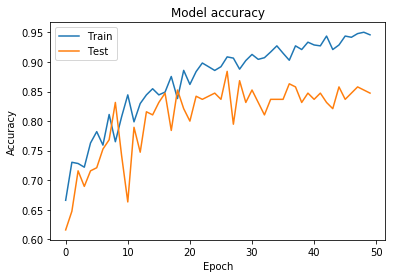

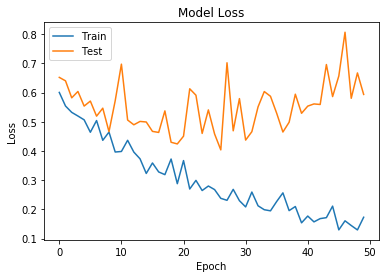

Epoch 1/25
25/25 [==============================] - 4s 151ms/step - loss: 0.7000 - accuracy: 0.5041 - val_loss: 0.6928 - val_accuracy: 0.5000
Epoch 2/25
25/25 [==============================] - 4s 142ms/step - loss: 0.6968 - accuracy: 0.5104 - val_loss: 0.6929 - val_accuracy: 0.5316
Epoch 3/25
25/25 [==============================] - 4s 143ms/step - loss: 0.7077 - accuracy: 0.5145 - val_loss: 0.6928 - val_accuracy: 0.5105
Epoch 4/25
25/25 [==============================] - 3s 139ms/step - loss: 0.6949 - accuracy: 0.4784 - val_loss: 0.6934 - val_accuracy: 0.4842
Epoch 5/25
25/25 [==============================] - 4s 145ms/step - loss: 0.6959 - accuracy: 0.4813 - val_loss: 0.6936 - val_accuracy: 0.4895
Epoch 6/25
25/25 [==============================] - 4s 143ms/step - loss: 0.6914 - accuracy: 0.5519 - val_loss: 0.6929 - val_accuracy: 0.5421
Epoch 7/25
25/25 [==============================] - 4s 143ms/step - loss: 0.6959 - accuracy: 0.4564 - val_loss: 0.6928 - val_accuracy: 0.5053
Epoch 

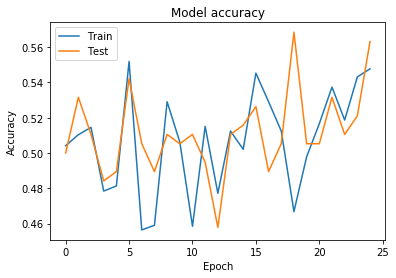

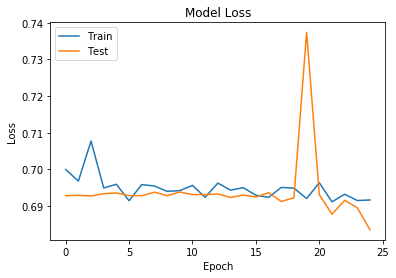

7/7 [==============================] - 0s 35ms/step - loss: 0.6983 - accuracy: 0.5052


[0.6983128786087036, 0.5051546096801758]

In [111]:
model_retrain2 = get_conv_net()

model_retrain2.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

history_retrain2 = model_retrain.fit_generator(
        train_generator,
        steps_per_epoch=500 // batch_size,
        epochs=50,
        validation_data=val_generator,
        validation_steps=200 // batch_size)

model_retrain2.save_weights('chirality_classification_retraining5pthen20p_again_weights_20200727.h5')

plt.figure()
plt.plot(history_retrain2.history['accuracy'])
plt.plot(history_retrain2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.figure()
plt.plot(history_retrain2.history['loss'])
plt.plot(history_retrain2.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#note before running this changesd the shuffle seed when making X_train_shuff20 so the network wouldn't se the extact same images over again
train_generator20 = train_datagen.flow(X_train_shuff20, y=Y_train_shuff20, batch_size=batch_size,seed=seed)
val_generator20 = test_datagen.flow(X_test_shuff20,y=Y_test_shuff20,batch_size=batch_size,seed=seed)

history_retrain2 = model_retrain2.fit_generator(
        train_generator20,
        steps_per_epoch=500 // batch_size,
        epochs=25,
        validation_data=val_generator20,
        validation_steps=200 // batch_size)

model_retrain2.save_weights('chirality_classification_retraining5pthen20p_again_weights_20200727.h5')

plt.figure()
plt.plot(history_retrain2.history['accuracy'])
plt.plot(history_retrain2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.figure()
plt.plot(history_retrain2.history['loss'])
plt.plot(history_retrain2.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


model_retrain2.evaluate(X_val_clean,Y_val_clean)

Epoch 1/50
25/25 [==============================] - 4s 149ms/step - loss: 0.6975 - accuracy: 0.4689 - val_loss: 0.6942 - val_accuracy: 0.4632
Epoch 2/50
25/25 [==============================] - 4s 143ms/step - loss: 0.6946 - accuracy: 0.4855 - val_loss: 0.6933 - val_accuracy: 0.4947
Epoch 3/50
25/25 [==============================] - 4s 141ms/step - loss: 0.6936 - accuracy: 0.4806 - val_loss: 0.6932 - val_accuracy: 0.4947
Epoch 4/50
25/25 [==============================] - 4s 144ms/step - loss: 0.6938 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5053
Epoch 5/50
25/25 [==============================] - 4s 150ms/step - loss: 0.6941 - accuracy: 0.4606 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 6/50
25/25 [==============================] - 4s 144ms/step - loss: 0.6933 - accuracy: 0.4855 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 7/50
25/25 [==============================] - 3s 138ms/step - loss: 0.6942 - accuracy: 0.4849 - val_loss: 0.6930 - val_accuracy: 0.5158
Epoch 

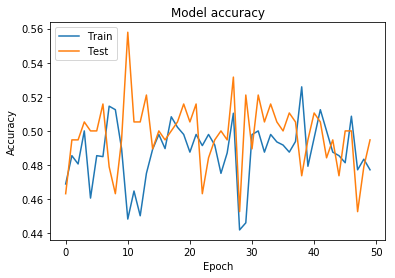

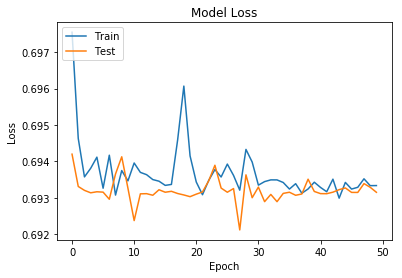

Epoch 1/25
25/25 [==============================] - 4s 155ms/step - loss: 0.6934 - accuracy: 0.4606 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/25
25/25 [==============================] - 4s 152ms/step - loss: 0.6933 - accuracy: 0.5083 - val_loss: 0.6929 - val_accuracy: 0.5211
Epoch 3/25
25/25 [==============================] - 4s 154ms/step - loss: 0.6933 - accuracy: 0.4834 - val_loss: 0.6930 - val_accuracy: 0.5105
Epoch 4/25
25/25 [==============================] - 4s 152ms/step - loss: 0.6934 - accuracy: 0.4569 - val_loss: 0.6931 - val_accuracy: 0.5158
Epoch 5/25
25/25 [==============================] - 4s 153ms/step - loss: 0.6931 - accuracy: 0.5166 - val_loss: 0.6932 - val_accuracy: 0.4895
Epoch 6/25
25/25 [==============================] - 4s 154ms/step - loss: 0.6934 - accuracy: 0.4979 - val_loss: 0.6931 - val_accuracy: 0.5053
Epoch 7/25
25/25 [==============================] - 4s 144ms/step - loss: 0.6932 - accuracy: 0.5083 - val_loss: 0.6932 - val_accuracy: 0.4947
Epoch 

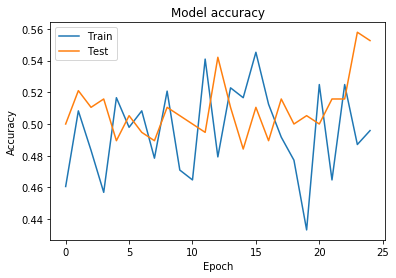

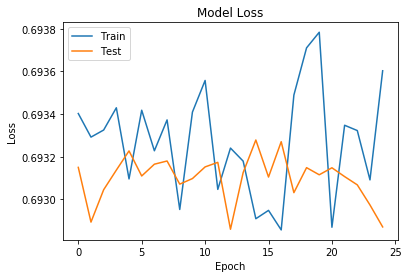

7/7 [==============================] - 0s 34ms/step - loss: 0.6932 - accuracy: 0.5000


[0.6931507587432861, 0.5]

In [112]:
model_retrain3 = get_conv_net()

model_retrain3.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

history_retrain3 = model_retrain3.fit_generator(
        train_generator,
        steps_per_epoch=500 // batch_size,
        epochs=50,
        validation_data=val_generator,
        validation_steps=200 // batch_size)

model_retrain3.save_weights('chirality_classification_retraining5pthen20p_again3_weights_20200727.h5')

plt.figure()
plt.plot(history_retrain3.history['accuracy'])
plt.plot(history_retrain3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.figure()
plt.plot(history_retrain3.history['loss'])
plt.plot(history_retrain3.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#note before running this changesd the shuffle seed when making X_train_shuff20 so the network wouldn't se the extact same images over again
train_generator20 = train_datagen.flow(X_train_shuff20, y=Y_train_shuff20, batch_size=batch_size,seed=seed)
val_generator20 = test_datagen.flow(X_test_shuff20,y=Y_test_shuff20,batch_size=batch_size,seed=seed)

history_retrain3 = model_retrain3.fit_generator(
        train_generator20,
        steps_per_epoch=500 // batch_size,
        epochs=25,
        validation_data=val_generator20,
        validation_steps=200 // batch_size)

model_retrain3.save_weights('chirality_classification_retraining5pthen20p_again3_weights_20200727.h5')

plt.figure()
plt.plot(history_retrain3.history['accuracy'])
plt.plot(history_retrain3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.figure()
plt.plot(history_retrain3.history['loss'])
plt.plot(history_retrain3.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


model_retrain3.evaluate(X_val_clean,Y_val_clean)

